## Plot eval loss

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Read the data

filename = 'gpt2_eval_clean.csv'
eval_losses = pd.read_csv(filename)
eval_losses

,epoch,gpt2-config1-fien-interleaved,gpt2-config1-deen-interleaved,gpt2-config2-fien-interleaved,gpt2-config2-deen-interleaved,gpt2-config3-fien-interleaved,gpt2-config3-deen-interleaved,gpt2-config1-deen-sequential-2,gpt2-config1-fien-sequential-2,gpt2-config3-deen-sequential-2,gpt2-config3-fien-sequential-2,gpt2-config2-deen-sequential-2,gpt2-config2-fien-sequential-2,gpt2-config1-de-sequential-1,gpt2-config3-fi-sequential-1,gpt2-config1-fi-sequential-1,gpt2-config3-de-sequential-1,gpt2-config2-fi-sequential-1,gpt2-config2-de-sequential-1,gpt2-config1-en-sequential
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.515427,3.836046,3.610861,4.064250,3.800779,3.671047,3.553041
1,2,3.459559,3.414441,3.535108,3.480453,3.705237,3.482892,NaN,NaN,NaN,NaN,NaN,NaN,3.307728,3.433175,3.384600,3.455848,3.444072,3.371652,3.364023
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.223858,3.324757,3.300791,3.309348,3.333836,3.269892,3.297235
3,4,3.314691,3.273892,3.358018,3.313557,3.426471,3.307180,NaN,NaN,NaN,NaN,NaN,NaN,3.176913,6.203976,3.249029,3.239676,3.274060,3.212025,3.260619
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.140632,3.261339,3.212629,3.196502,3.232678,3.174387,3.234025
5,6,3.245129,3.206870,3.281350,3.238680,3.351152,3.233275,NaN,NaN,NaN,NaN,NaN,NaN,3.114835,3.219357,3.187970,3.160903,3.201545,3.143425,3.216141
6,7,NaN,NaN,NaN,NaN,NaN,NaN,3.247551,3.254866,3.265296,3.269740,3.283178,3.285966,NaN,NaN,NaN,NaN,NaN,NaN,3.203642
7,8,3.201292,3.164097,3.230969,3.191184,3.282901,3.177741,3.157198,3.154195,3.173028,3.159963,3.184442,3.167118,NaN,NaN,NaN,NaN,NaN,NaN,3.190414
8,9,NaN,NaN,NaN,NaN,NaN,NaN,3.117934,3.104893,3.127741,3.110635,3.136651,3.115306,NaN,NaN,NaN,NaN,NaN,NaN,3.184851
9,10,3.170299,3.133079,3.196198,3.156776,3.233629,3.136515,3.087673,3.074507,3.128239,3.075982,3.107955,3.082941,NaN,NaN,NaN,NaN,NaN,NaN,3.182909


In [17]:
#eval_losses.drop
print(eval_losses.columns[1:])

Index(['gpt2-config1-fien-interleaved', 'gpt2-config1-deen-interleaved',
       'gpt2-config2-fien-interleaved', 'gpt2-config2-deen-interleaved',
       'gpt2-config3-fien-interleaved', 'gpt2-config3-deen-interleaved',
       'gpt2-config1-deen-sequential-2 ', 'gpt2-config1-fien-sequential-2',
       'gpt2-config3-deen-sequential-2', 'gpt2-config3-fien-sequential--2',
       'gpt2-config2-deen-sequential-2', 'gpt2-config2-fien-sequential-2',
       'gpt2-config1-de-sequential-1', 'gpt2-config3-fi-sequential-1',
       'gpt2-config1-fi-sequential-1', 'gpt2-config3-de-sequential-1',
       'gpt2-config2-fi-sequential-1', 'gpt2-config2-de-sequential-1',
       'gpt2-config1-en-sequential'],
      dtype='object')


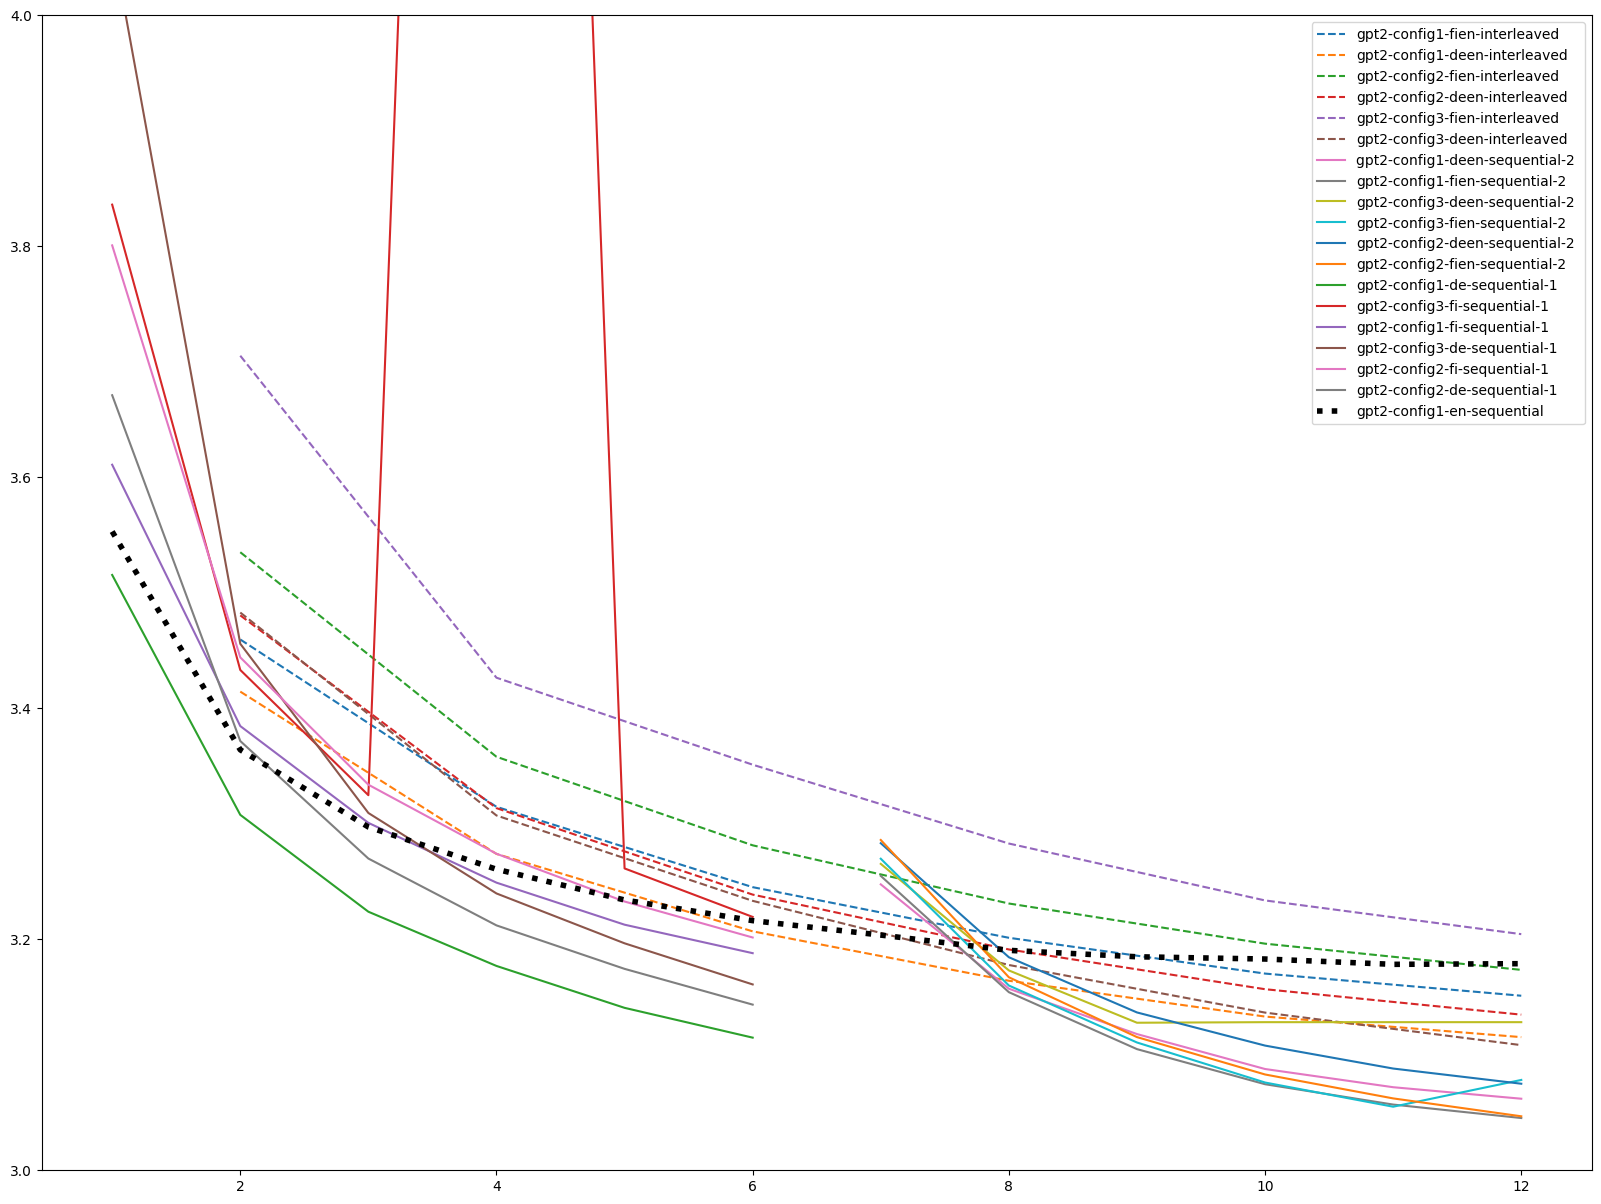

In [61]:
# Plot the data

x = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(20,15))

for column in eval_losses.columns[1:7]:
    plt.plot(x, eval_losses[column].interpolate(), linestyle = 'dashed', label = column)

for column in eval_losses.columns[7:-1]:
    plt.plot(x, eval_losses[column], label = column)
    

plt.plot(x, eval_losses['gpt2-config1-en-sequential'], linestyle = 'dotted', linewidth=4, color = 'black', label = 'gpt2-config1-en-sequential')

plt.ylim((3,4))
plt.legend()
plt.show()
